In [2]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM,GRU,Dense,MaxPooling1D,Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import add,Conv1D
from tensorflow.keras.layers import Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping




from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

test danych wlasnych bez dotrenowania

C:\Users\u144572\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\u144572\AppData\Local\Temp\ipykernel_19084\2647177008.py:18: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
                      Metric      Value
0  Mean Absolute Error (MAE)   6.516879
1   Mea

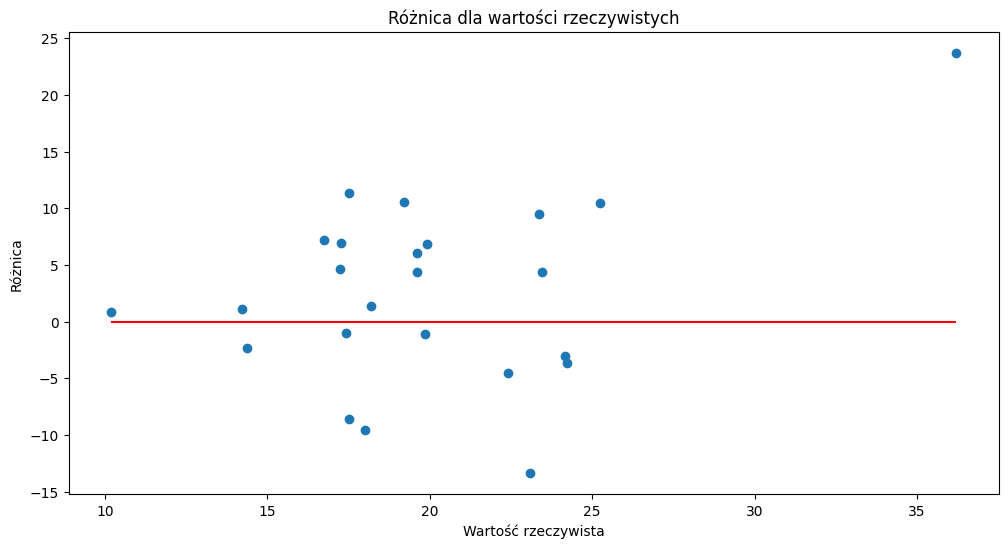

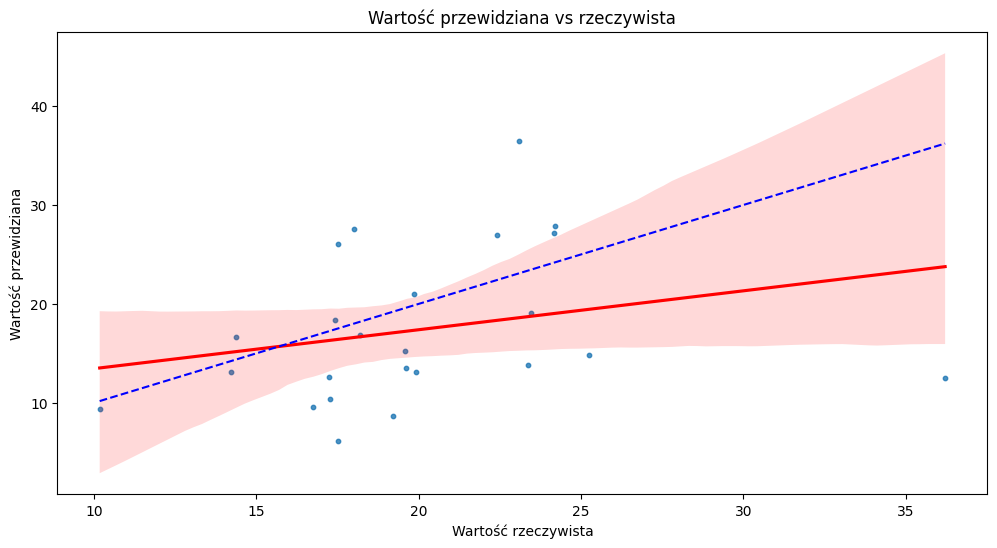

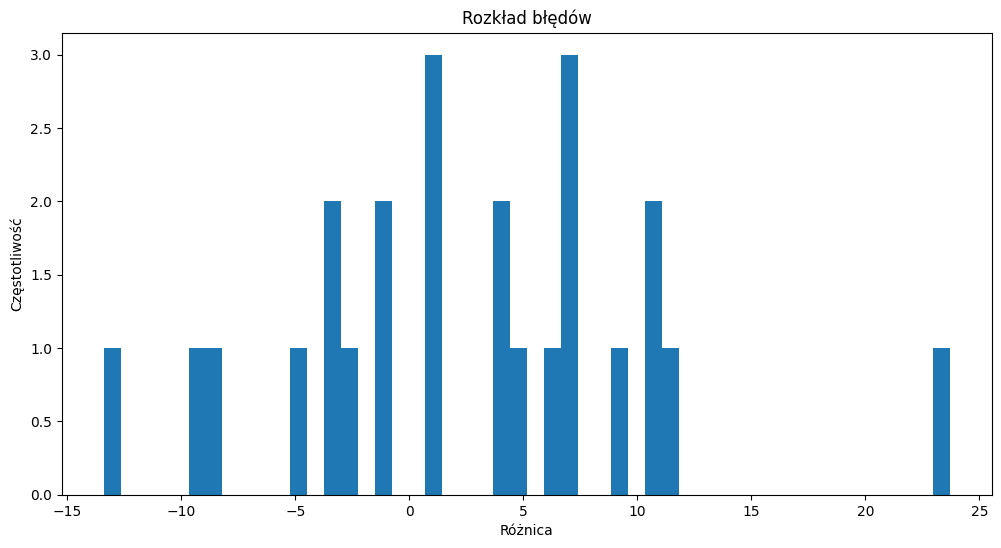

In [76]:
import re
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
root = 'C:/Users/u144572/self_development/ml_method_kaggle/own_data_test/'

filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.wav' in s]
# Load your model here
model = load_model('150_epochs_ilosc_cykli_bez_szumow.h5')
model.load_weights('150_epochs_ilosc_cykli_bez_szumow.weights.h5')

def calculated_rr_and_predicted(file_name, root):
    respiratory_cycle_number = int(re.search(r'\d+', file_name).group())
    audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')
    rr = respiratory_cycle_number / (audio_length / 60)

    # Load audio with 22050 Hz sampling rate
    data_x, sampling_rate = librosa.load(f'{root}{file_name}.wav', res_type='kaiser_fast')
    
    # Extract features using MFCC (50 features)
    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=50).T, axis=0)

    # Reshape features to match the model's input shape (1, 50, 1)
    features = features.reshape(1, 50, 1)
    
    # Get the prediction
    predicted_value = model.predict(features)[0][0]

    return pd.DataFrame(data=[[file_name, rr, (predicted_value / (audio_length / 60))]], columns=['patient_id', 'rr', "rr_predicted"])

i_list = []
for s in filenames:
    i = calculated_rr_and_predicted(s, root)
    i_list.append(i)
recording_info = pd.concat(i_list, axis=0)

# Calculate metrics
mae = mean_absolute_error(recording_info['rr'], recording_info['rr_predicted'])
mse = mean_squared_error(recording_info['rr'], recording_info['rr_predicted'])
r2 = r2_score(recording_info['rr'], recording_info['rr_predicted'])

metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score'],
    'Value': [mae, mse, r2]
})


# Display the metrics
print(metrics_df)

# Plotting
def plot_results(df):
    # Calculate residuals
    residuals = df['rr'] - df['rr_predicted']
    
    # Residuals Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['rr'], residuals)
    plt.hlines(y=0, xmin=min(df['rr']), xmax=max(df['rr']), colors='r')
    plt.title('Różnica dla wartości rzeczywistych')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Różnica')
    plt.show()

    # Predicted vs Actual Values with Linear Regression
    plt.figure(figsize=(12, 6))
    sns.regplot(x='rr', y='rr_predicted', data=df, scatter_kws={'s':10}, line_kws={"color": "red"})
    plt.plot([min(df['rr']), max(df['rr'])], [min(df['rr']), max(df['rr'])], color='blue', linestyle='dashed')  # Line of perfect prediction
    plt.title('Wartość przewidziana vs rzeczywista')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Wartość przewidziana')
    plt.show()

    # Error Distribution (Histogram of residuals)
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=50)
    plt.title('Rozkład błędów')
    plt.xlabel('Różnica')
    plt.ylabel('Częstotliwość')
    plt.show()

# Call the plotting function
plot_results(recording_info)

In [ ]:
dotrenowania

In [77]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import os

root = "own_data_train"
# Lista plików (zakładając, że masz już listę plików, np. z os.listdir)
file_list = os.listdir(root)  # Zastąp 'ścieżka_do_twojego_folderu' odpowiednią ścieżką

# Inicjalizacja listy do przechowywania danych
data = []

# Iteracja po liście plików
for filename in file_list:
    # Wydobywanie liczby całkowitej z nazwy pliku przy użyciu wyrażenia regularnego
    match = re.search(r'\d+', filename)  # Zakładając, że liczba całkowita składa się z co najmniej jednej cyfry
    if match:
        integer = int(match.group())
        data.append({'cycles': integer, 'filename': filename[:-4]})

# Konwersja listy do DataFrame
df = pd.DataFrame(data, columns=['cycles', 'filename'])
# print(type(df["cycles"][0]))

# Parametry zduplikowania
duplication_factor = 1  # Ilość zduplikowania danych

# Wczytanie danych z CSV
audio_data = root + "/"
# df = pd.read_csv('cycles_count_own_data.csv', names=['Start', 'filename'], header=0)

def mfcc_feature_extraction_rr(dir_):
    X_ = []
    y_ = []
    data = df
    features = 50
    for soundDir in os.listdir(dir_):
        if soundDir[-3:] == 'wav':               
            data_x, sampling_rate = librosa.load(dir_ + soundDir, res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
            # Dodajemy cechy i etykiety
            X_.append(mfccs)
            y_.append(list(data[data['filename'] == (soundDir[:-4])]['cycles'])[0])
    
    # Zduplikowanie danych
    X_data = np.tile(np.array(X_), (duplication_factor, 1))
    y_data = np.tile(np.array(y_), duplication_factor)
    
    return X_data, y_data

# Wywołanie funkcji ekstrakcji cech
res_data, res_y = mfcc_feature_extraction_rr(audio_data)


# Podział danych na zbiory treningowe, walidacyjne i testowe
x_train, x_val, y_train, y_val = train_test_split(res_data, res_y, test_size=0.175, random_state=10)

# Wyświetlenie rozmiarów zbiorów danych
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

x_train_lstm = np.expand_dims(x_train,axis=2)
x_val_lstm = np.expand_dims(x_val,axis=2)

# # Podział danych na zbiory treningowe, walidacyjne i testowe
# x_train, x_val, y_train, y_val = train_test_split(res_data, res_y, test_size=0.6, random_state=10)
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.6, random_state=10)

# # Wyświetlenie rozmiarów zbiorów danych
# print(x_train.shape, x_val.shape, x_test.shape)
# print(y_train.shape, y_val.shape, y_test.shape)

# x_train_lstm = np.expand_dims(x_train,axis=2)
# x_val_lstm = np.expand_dims(x_val,axis=2)
# x_test_lstm = np.expand_dims(x_test,axis=2)


(25, 50) (6, 50)
(25,) (6,)


In [79]:
from tensorflow.keras.models import load_model
import tensorflow as tf
model = load_model('150_epochs_ilosc_cykli_bez_szumow.h5')
model.load_weights('150_epochs_ilosc_cykli_bez_szumow.weights.h5')

# Compile the model
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimiser, loss='mean_squared_error', metrics=['mae'])

history = model.fit(
    x_train_lstm, y_train, batch_size=16, epochs=50, validation_data=(x_val_lstm, y_val),
  )

# Zapisz zaktualizowany model
model.save("200_epochs_ilosc_cykli_bez_szumow_dotrenowany_o_dane_wlasne.h5")
model.save_weights('200_epochs_ilosc_cykli_bez_szumow_dotrenowany_o_dane_wlasne.weights.h5')

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 618ms/step - loss: 20.2796 - mae: 3.6670 - val_loss: 10.4978 - val_mae: 2.1574
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - loss: 12.6644 - mae: 2.6492 - val_loss: 10.1216 - val_mae: 2.1714
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - loss: 4.3334 - mae: 1.5612 - val_loss: 10.3138 - val_mae: 2.2469
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 8.3429 - mae: 2.0733 - val_loss: 11.0021 - val_mae: 2.3883
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 12.3312 - mae: 2.9294 - val_loss: 11.2551 - val_mae: 2.4548
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 7.6133 - mae: 2.2303 - val_loss: 11.4354 - val_mae: 2.4867
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - loss: 6.3922 - mae: 2.0853 - val_loss: 11.7000 - val_mae: 2.5467
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - loss: 6.4937 - mae: 2.0105 - val_loss: 12.1770 - val_mae: 2.5988
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - loss: 11.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Mean Absolute Error (MAE): 2.0159
Mean Squared Error (MSE): 6.7052
R² Score: -1.1984


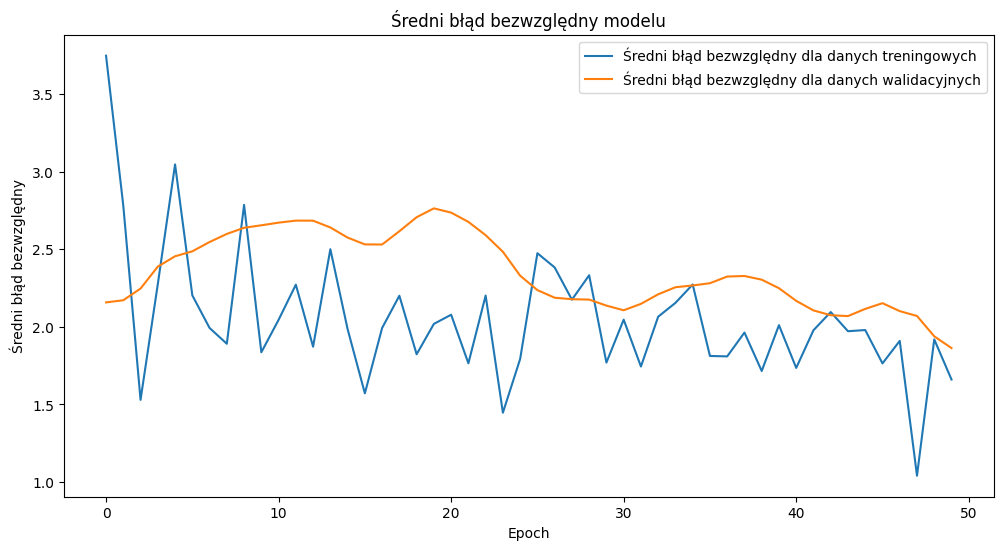

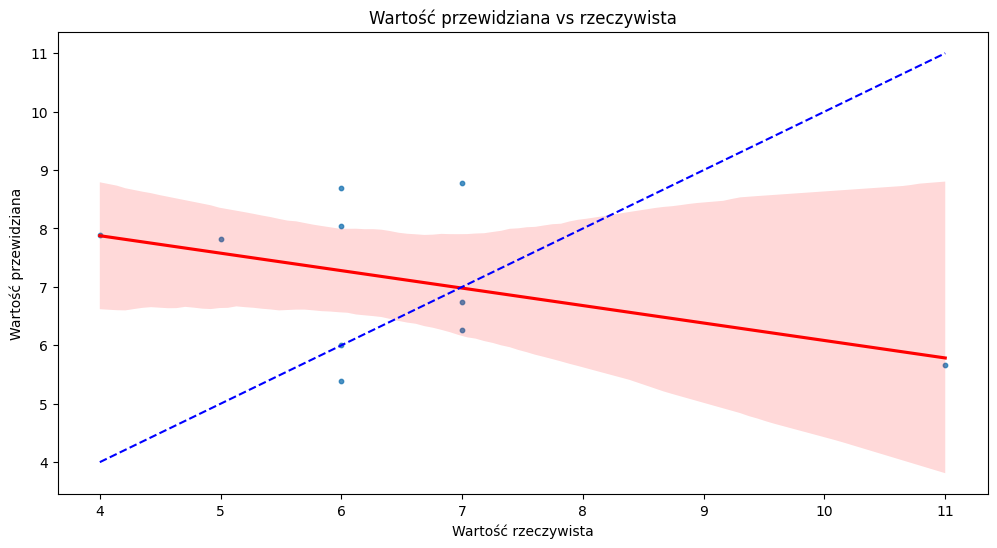

In [80]:
# Plot training & validation MAE values

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test_lstm)

# Ensure y_test and y_pred are 1D arrays
y_test = np.array(y_test).ravel()
y_pred = np.array(y_pred).ravel()

# Calculate MAE, MSE, and R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Średni błąd bezwzględny dla danych treningowych')
plt.plot(history.history['val_mae'], label='Średni błąd bezwzględny dla danych walidacyjnych')
plt.title('Średni błąd bezwzględny modelu')
plt.xlabel('Epoch')
plt.ylabel('Średni błąd bezwzględny')
plt.legend(loc='upper right')
plt.show()


# Załóżmy, że y_test i y_pred są dostępne jako NumPy array
y_test = np.array(y_test).ravel()  # Upewnij się, że y_test jest jednowymiarowy
y_pred = np.array(y_pred).ravel()  # Upewnij się, że y_pred jest jednowymiarowy

# Przekształć dane na DataFrame
df = pd.DataFrame({'Wartość rzeczywista': y_test, 'Wartość przewidziana': y_pred})

# Wykres Wartość przewidziana vs rzeczywista z regresją liniową
plt.figure(figsize=(12, 6))
sns.regplot(x='Wartość rzeczywista', y='Wartość przewidziana', data=df, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.plot([min(df['Wartość rzeczywista']), max(df['Wartość rzeczywista'])], 
         [min(df['Wartość rzeczywista']), max(df['Wartość rzeczywista'])], 
         color='blue', linestyle='dashed')  # Linia idealnej predykcji
plt.title('Wartość przewidziana vs rzeczywista')
plt.xlabel('Wartość rzeczywista')
plt.ylabel('Wartość przewidziana')
plt.show()


C:\Users\u144572\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\u144572\AppData\Local\Temp\ipykernel_19084\3291741833.py:20: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
                      Metric      Value
0  Mean Absolute Error (MAE)   6.098142
1   Mea

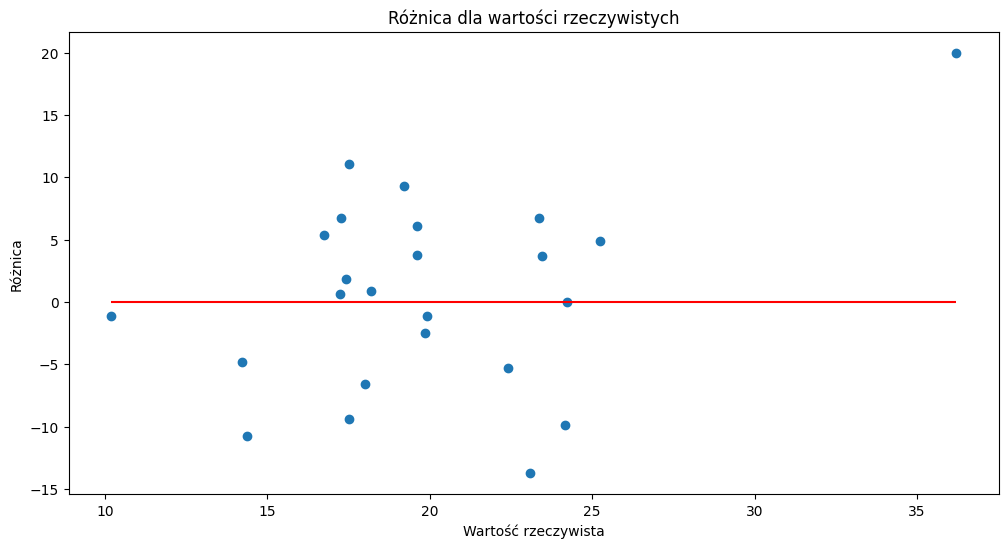

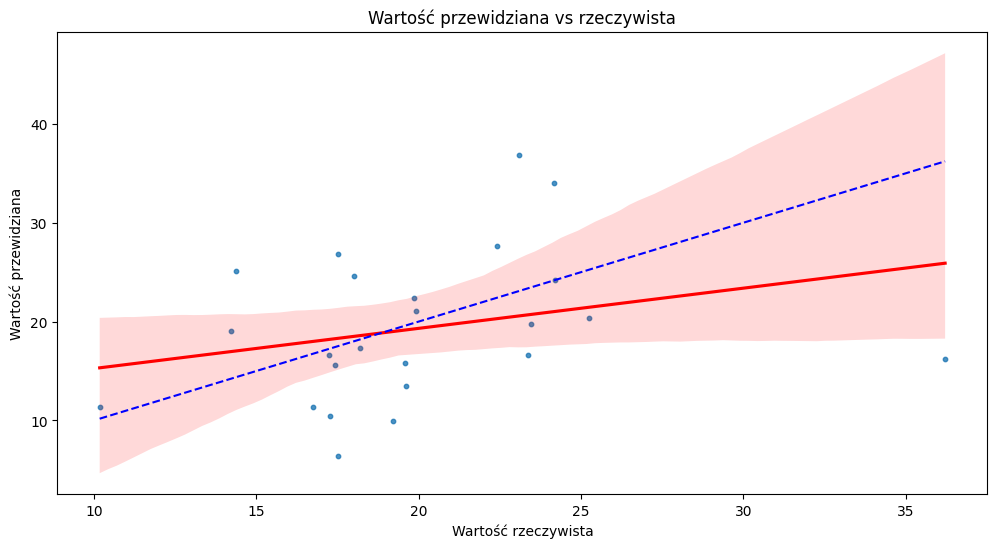

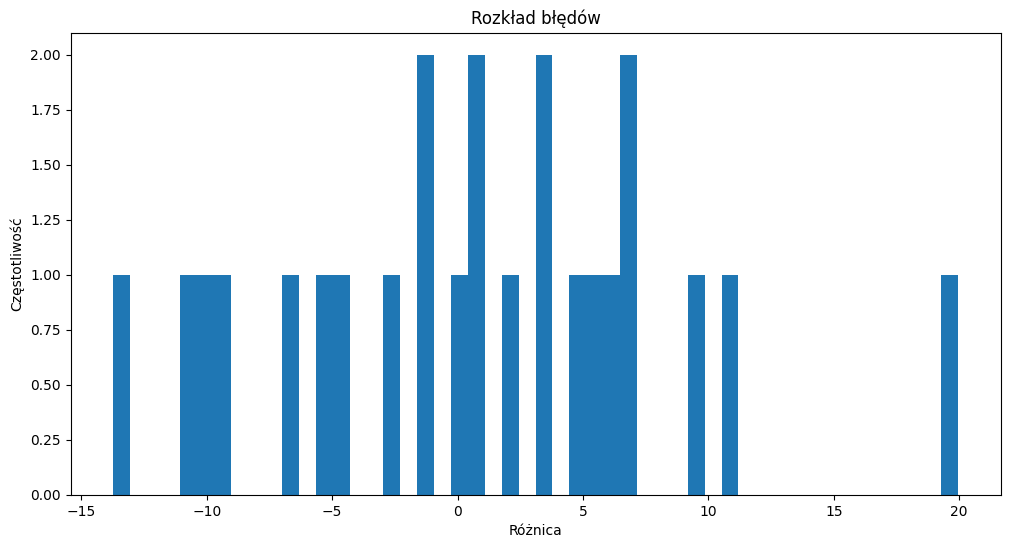

In [81]:
import re
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
root = 'C:/Users/u144572/self_development/ml_method_kaggle/own_data_test/'

filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.wav' in s]
filenames
# Load your model here
model = load_model('200_epochs_ilosc_cykli_bez_szumow_dotrenowany_o_dane_wlasne.h5')
model.load_weights('200_epochs_ilosc_cykli_bez_szumow_dotrenowany_o_dane_wlasne.weights.h5')

def calculated_rr_and_predicted(file_name, root):
    respiratory_cycle_number = int(re.search(r'\d+', file_name).group())
    audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')
    rr = respiratory_cycle_number / (audio_length / 60)

    # Load audio with 22050 Hz sampling rate
    data_x, sampling_rate = librosa.load(f'{root}{file_name}.wav', res_type='kaiser_fast')
    
    # Extract features using MFCC (50 features)
    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=50).T, axis=0)

    # Reshape features to match the model's input shape (1, 50, 1)
    features = features.reshape(1, 50, 1)
    
    # Get the prediction
    predicted_value = model.predict(features)[0][0]

    return pd.DataFrame(data=[[file_name, rr, (predicted_value / (audio_length / 60))]], columns=['patient_id', 'rr', "rr_predicted"])

i_list = []
for s in filenames:
    i = calculated_rr_and_predicted(s, root)
    i_list.append(i)
recording_info = pd.concat(i_list, axis=0)

# Calculate metrics
mae = mean_absolute_error(recording_info['rr'], recording_info['rr_predicted'])
mse = mean_squared_error(recording_info['rr'], recording_info['rr_predicted'])
r2 = r2_score(recording_info['rr'], recording_info['rr_predicted'])

metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score'],
    'Value': [mae, mse, r2]
})


# Display the metrics
print(metrics_df)

# Plotting
def plot_results(df):
    # Calculate residuals
    residuals = df['rr'] - df['rr_predicted']
    
    # Residuals Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['rr'], residuals)
    plt.hlines(y=0, xmin=min(df['rr']), xmax=max(df['rr']), colors='r')
    plt.title('Różnica dla wartości rzeczywistych')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Różnica')
    plt.show()

    # Predicted vs Actual Values with Linear Regression
    plt.figure(figsize=(12, 6))
    sns.regplot(x='rr', y='rr_predicted', data=df, scatter_kws={'s':10}, line_kws={"color": "red"})
    plt.plot([min(df['rr']), max(df['rr'])], [min(df['rr']), max(df['rr'])], color='blue', linestyle='dashed')  # Line of perfect prediction
    plt.title('Wartość przewidziana vs rzeczywista')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Wartość przewidziana')
    plt.show()

    # Error Distribution (Histogram of residuals)
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=50)
    plt.title('Rozkład błędów')
    plt.xlabel('Różnica')
    plt.ylabel('Częstotliwość')
    plt.show()

# Call the plotting function
plot_results(recording_info)

In [82]:
# Define the model
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))

model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimiser, loss='mean_squared_error', metrics=['mae'])

# import pandas as pd
# import re
# import os

# # Lista plików (zakładając, że masz już listę plików, np. z os.listdir)
# file_list = os.listdir('own_data')  # Zastąp 'ścieżka_do_twojego_folderu' odpowiednią ścieżką

# # Inicjalizacja listy do przechowywania danych
# data = []

# # Iteracja po liście plików
# for filename in file_list:
#     # Wydobywanie liczby całkowitej z nazwy pliku przy użyciu wyrażenia regularnego
#     match = re.search(r'\d+', filename)  # Zakładając, że liczba całkowita składa się z co najmniej jednej cyfry
#     if match:
#         integer = int(match.group())
#         data.append({'cycles': integer, 'filename': filename[:-4]})

# # Konwersja listy do DataFrame
# df = pd.DataFrame(data, columns=['cycles', 'filename'])
# # print(type(df["cycles"][0]))
# df

# import os
# import numpy as np
# import pandas as pd
# import librosa
# from sklearn.model_selection import train_test_split

# # Parametry zduplikowania
# duplication_factor = 1  # Ilość zduplikowania danych

# # Wczytanie danych z CSV
# audio_data = "own_data/"
# # df = pd.read_csv('cycles_count_own_data.csv', names=['Start', 'filename'], header=0)
# print(df)

# def mfcc_feature_extraction_rr(dir_):
#     X_ = []
#     y_ = []
#     data = df
#     features = 50
#     for soundDir in os.listdir(dir_):
#         if soundDir[-3:] == 'wav':               
#             data_x, sampling_rate = librosa.load(dir_ + soundDir, res_type='kaiser_fast')
#             mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             # Dodajemy cechy i etykiety
#             X_.append(mfccs)
#             y_.append(list(data[data['filename'] == (soundDir[:-4])]['cycles'])[0])
    
#     # Zduplikowanie danych
#     X_data = np.tile(np.array(X_), (duplication_factor, 1))
#     y_data = np.tile(np.array(y_), duplication_factor)
    
#     return X_data, y_data

# # Wywołanie funkcji ekstrakcji cech
# res_data, res_y = mfcc_feature_extraction_rr(audio_data)


# # # Podział danych na zbiory treningowe, walidacyjne i testowe
# # x_train, x_val, y_train, y_val = train_test_split(res_data, res_y, test_size=0.2, random_state=10)

# # # Wyświetlenie rozmiarów zbiorów danych
# # print(x_train.shape, x_val.shape)
# # print(y_train.shape, y_val.shape)

# # x_train_lstm = np.expand_dims(x_train,axis=2)
# # x_val_lstm = np.expand_dims(x_val,axis=2)

# # Podział danych na zbiory treningowe, walidacyjne i testowe
# x_train, x_val, y_train, y_val = train_test_split(res_data, res_y, test_size=0.175, random_state=10)
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.175, random_state=10)

# # Wyświetlenie rozmiarów zbiorów danych
# print(x_train.shape, x_val.shape, x_test.shape)
# print(y_train.shape, y_val.shape, y_test.shape)

# x_train_lstm = np.expand_dims(x_train,axis=2)
# x_val_lstm = np.expand_dims(x_val,axis=2)
# x_test_lstm = np.expand_dims(x_test,axis=2)

from tensorflow.keras.models import load_model
import tensorflow as tf

history = model.fit(
    x_train_lstm, y_train, batch_size=16, epochs=150, validation_data=(x_val_lstm, y_val),
  )

# Zapisz zaktualizowany model
model.save("150_epochs_ilosc_cykli_bez_szumow_tylko_dane_wlasne.h5")
model.save_weights('150_epochs_ilosc_cykli_bez_szumow_tylko_dane_wlasne.weights.h5')

C:\Users\u144572\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 952ms/step - loss: 71.8762 - mae: 7.9855 - val_loss: 66.2705 - val_mae: 7.6181
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - loss: 76.0266 - mae: 8.1659 - val_loss: 66.2382 - val_mae: 7.6177
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - loss: 73.5018 - mae: 8.0077 - val_loss: 65.8866 - val_mae: 7.5966
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - loss: 70.7451 - mae: 7.8135 - val_loss: 64.7479 - val_mae: 7.5246
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - loss: 65.6759 - mae: 7.5756 - val_loss: 63.4606 - val_mae: 7.4407
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - loss: 65.8996 - mae: 7.6058 - val_loss: 62.4949 - val_mae: 7.3753
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - loss: 67.2742 - mae: 7.5554 - val_loss: 61.6342 - val_mae: 7.3161
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - loss: 60.5147 - mae: 7.0891 - val_loss: 60.5500 - val_mae: 7.2405
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/st

C:\Users\u144572\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\u144572\AppData\Local\Temp\ipykernel_19084\819306361.py:20: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
                      Metric      Value
0  Mean Absolute Error (MAE)   7.796691
1   Mea

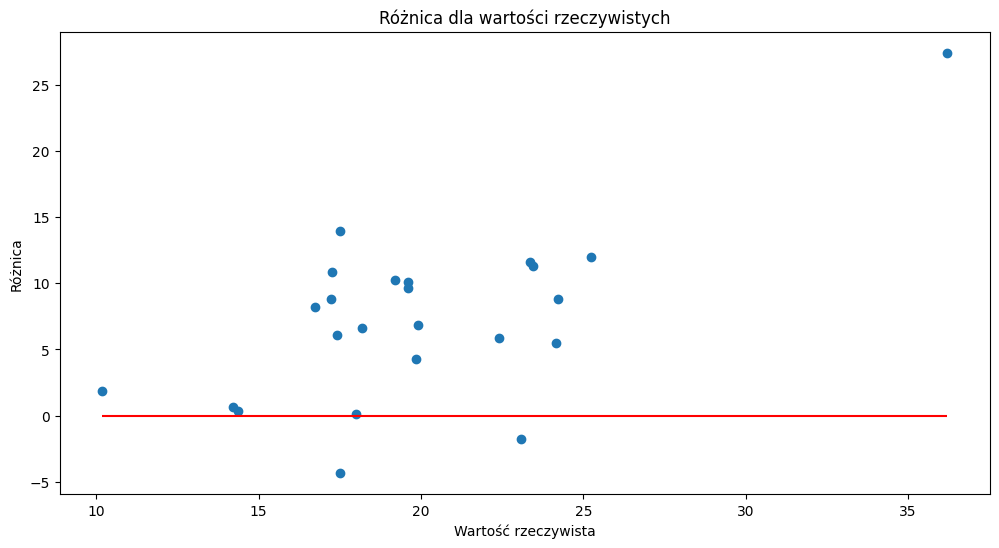

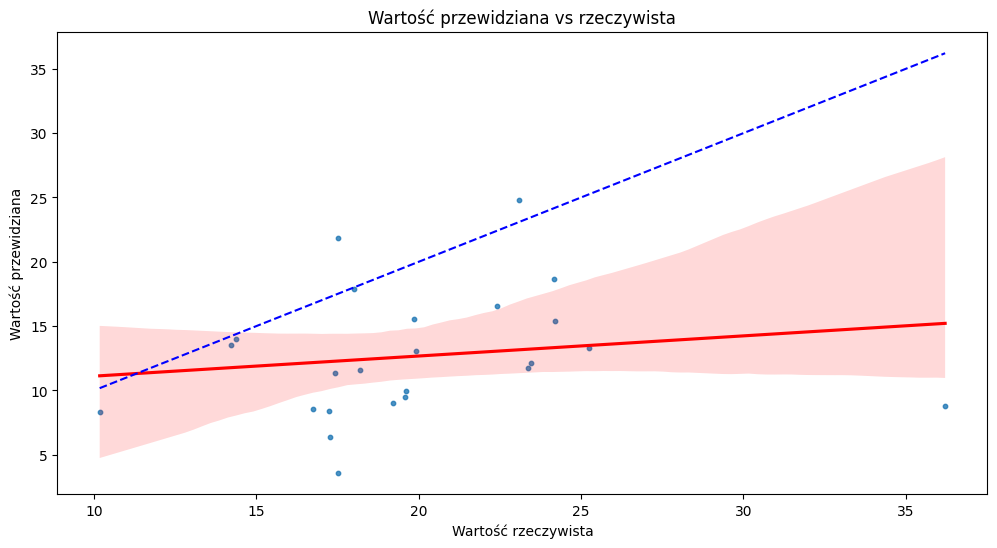

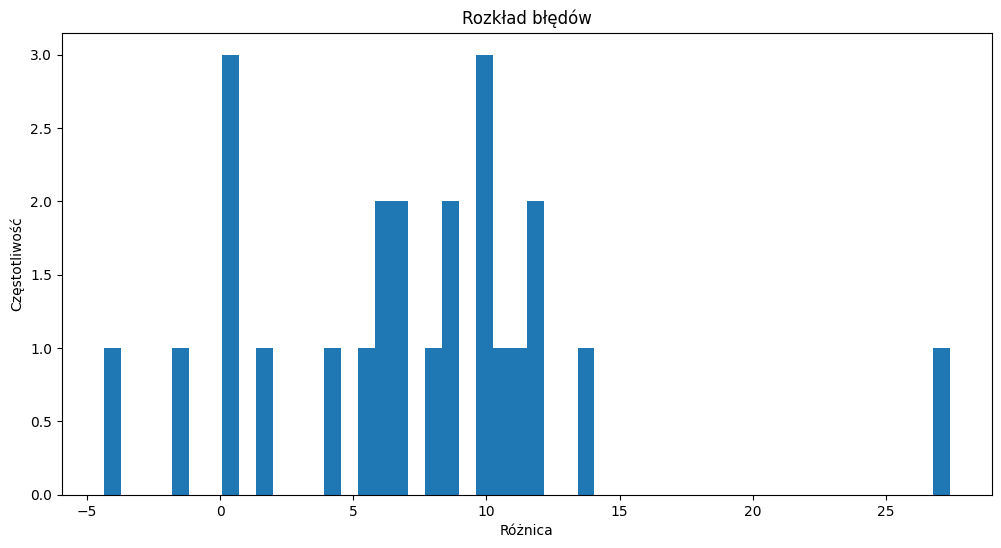

In [83]:
import re
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
root = 'C:/Users/u144572/self_development/ml_method_kaggle/own_data_test/'

filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.wav' in s]
filenames
# Load your model here
model = load_model('150_epochs_ilosc_cykli_bez_szumow_tylko_dane_wlasne.h5')
model.load_weights('150_epochs_ilosc_cykli_bez_szumow_tylko_dane_wlasne.weights.h5')

def calculated_rr_and_predicted(file_name, root):
    respiratory_cycle_number = int(re.search(r'\d+', file_name).group())
    audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')
    rr = respiratory_cycle_number / (audio_length / 60)

    # Load audio with 22050 Hz sampling rate
    data_x, sampling_rate = librosa.load(f'{root}{file_name}.wav', res_type='kaiser_fast')
    
    # Extract features using MFCC (50 features)
    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=50).T, axis=0)

    # Reshape features to match the model's input shape (1, 50, 1)
    features = features.reshape(1, 50, 1)
    
    # Get the prediction
    predicted_value = model.predict(features)[0][0]

    return pd.DataFrame(data=[[file_name, rr, (predicted_value / (audio_length / 60))]], columns=['patient_id', 'rr', "rr_predicted"])

i_list = []
for s in filenames:
    i = calculated_rr_and_predicted(s, root)
    i_list.append(i)
recording_info = pd.concat(i_list, axis=0)

# Calculate metrics
mae = mean_absolute_error(recording_info['rr'], recording_info['rr_predicted'])
mse = mean_squared_error(recording_info['rr'], recording_info['rr_predicted'])
r2 = r2_score(recording_info['rr'], recording_info['rr_predicted'])

metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score'],
    'Value': [mae, mse, r2]
})


# Display the metrics
print(metrics_df)

# Plotting
def plot_results(df):
    # Calculate residuals
    residuals = df['rr'] - df['rr_predicted']
    
    # Residuals Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['rr'], residuals)
    plt.hlines(y=0, xmin=min(df['rr']), xmax=max(df['rr']), colors='r')
    plt.title('Różnica dla wartości rzeczywistych')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Różnica')
    plt.show()

    # Predicted vs Actual Values with Linear Regression
    plt.figure(figsize=(12, 6))
    sns.regplot(x='rr', y='rr_predicted', data=df, scatter_kws={'s':10}, line_kws={"color": "red"})
    plt.plot([min(df['rr']), max(df['rr'])], [min(df['rr']), max(df['rr'])], color='blue', linestyle='dashed')  # Line of perfect prediction
    plt.title('Wartość przewidziana vs rzeczywista')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Wartość przewidziana')
    plt.show()

    # Error Distribution (Histogram of residuals)
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=50)
    plt.title('Rozkład błędów')
    plt.xlabel('Różnica')
    plt.ylabel('Częstotliwość')
    plt.show()

# Call the plotting function
plot_results(recording_info)

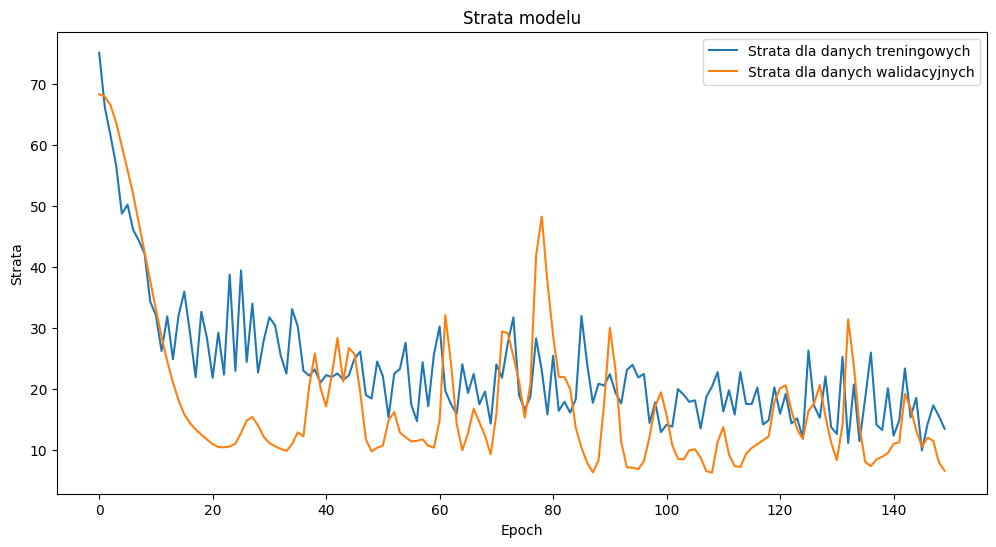

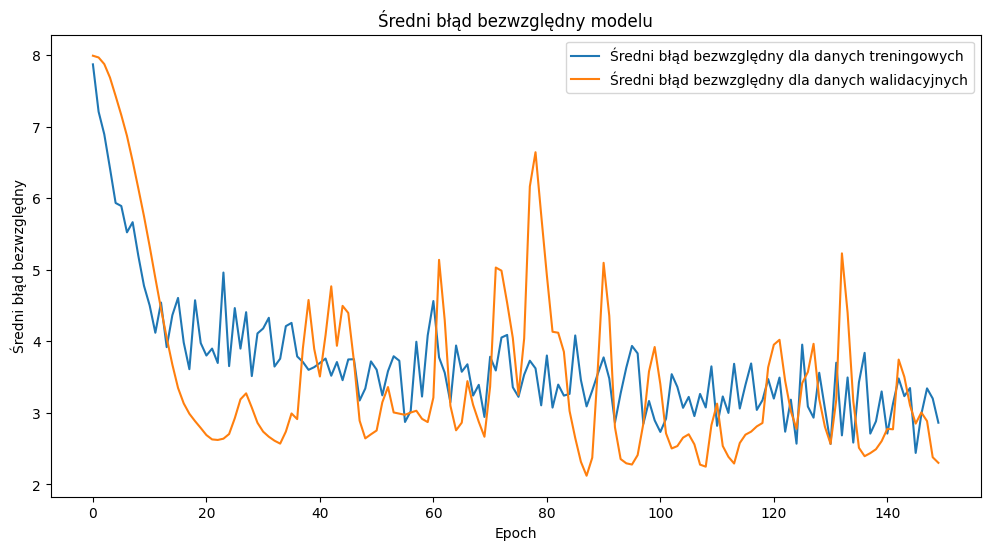

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


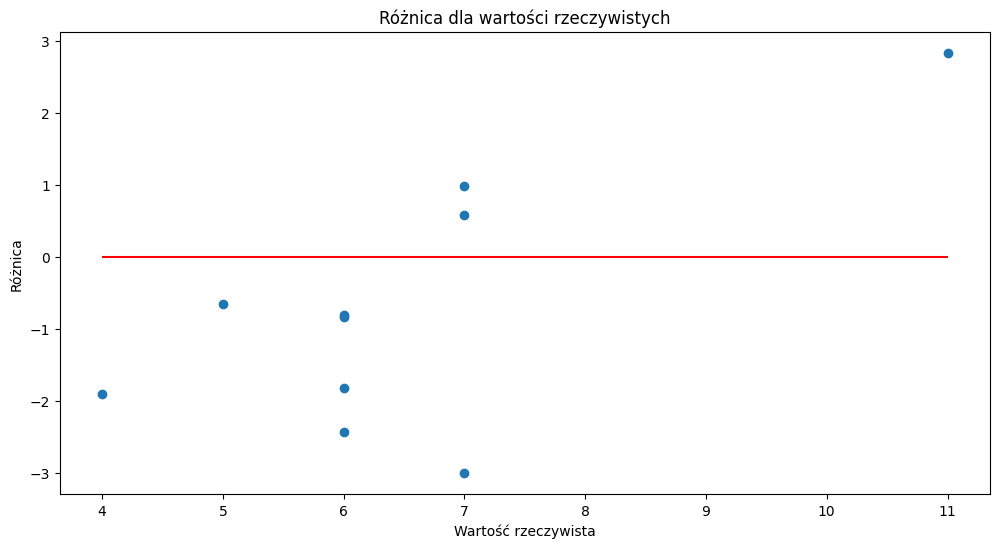

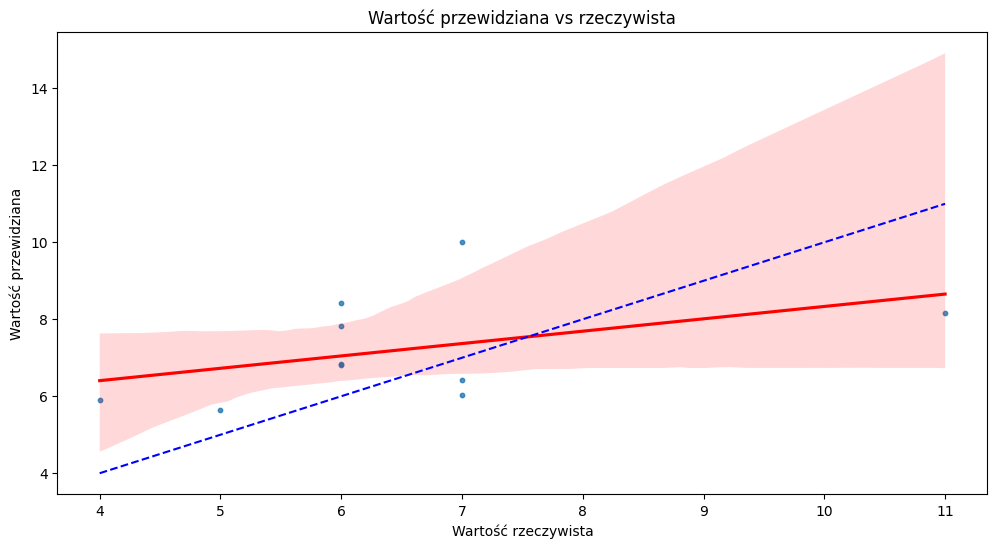

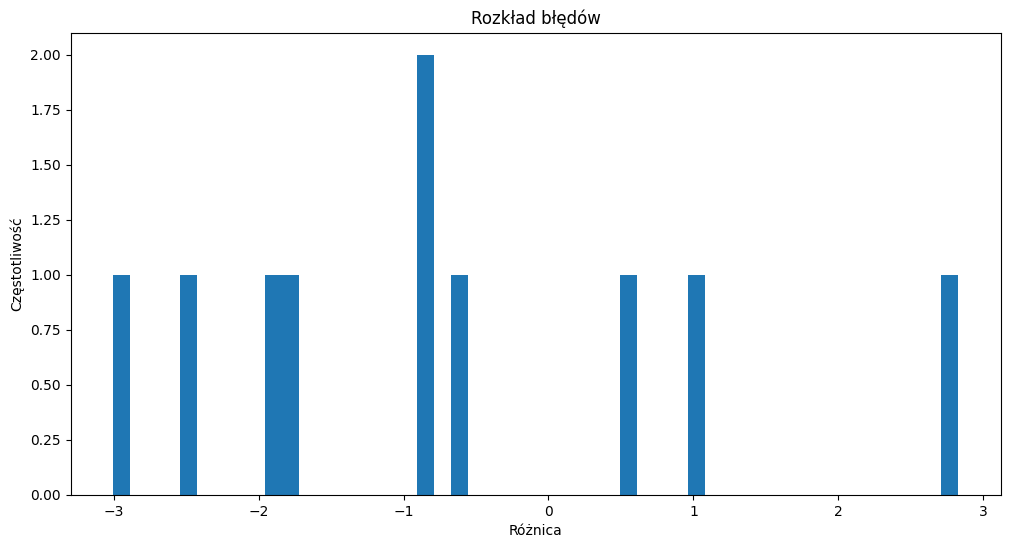

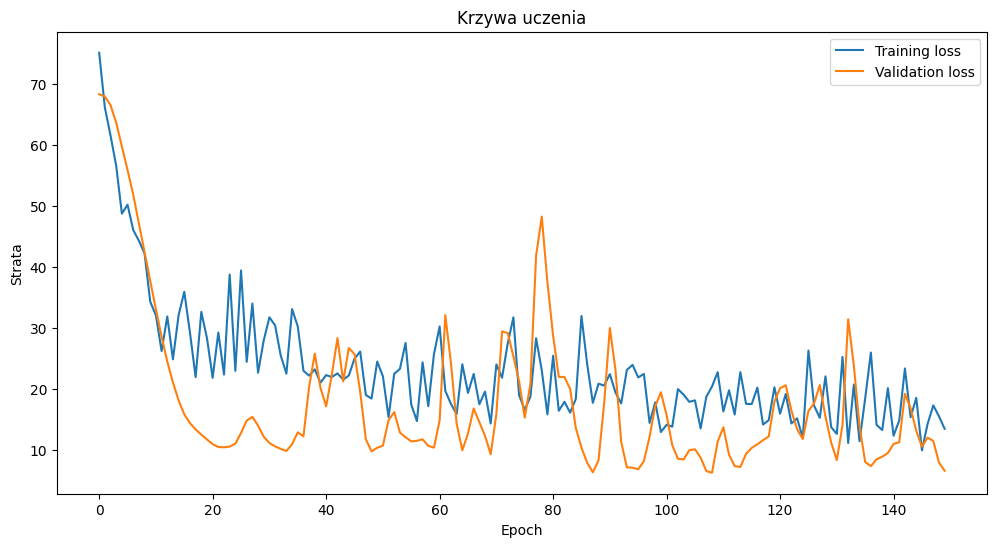

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `history` is the History object returned by model.fit()
# and `x_test_lstm`, `y_test` are the test datasets

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Strata dla danych treningowych')
plt.plot(history.history['val_loss'], label='Strata dla danych walidacyjnych')
plt.title('Strata modelu')
plt.xlabel('Epoch')
plt.ylabel('Strata')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Średni błąd bezwzględny dla danych treningowych')
plt.plot(history.history['val_mae'], label='Średni błąd bezwzględny dla danych walidacyjnych')
plt.title('Średni błąd bezwzględny modelu')
plt.xlabel('Epoch')
plt.ylabel('Średni błąd bezwzględny')
plt.legend(loc='upper right')
plt.show()

# Make predictions
y_pred = model.predict(x_test_lstm)

# Residuals Plot
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r')
plt.title('Różnica dla wartości rzeczywistych')
plt.xlabel('Wartość rzeczywista')
plt.ylabel('Różnica')
plt.show()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Załóżmy, że y_test i y_pred są dostępne jako NumPy array
y_test = np.array(y_test).ravel()  # Upewnij się, że y_test jest jednowymiarowy
y_pred = np.array(y_pred).ravel()  # Upewnij się, że y_pred jest jednowymiarowy

# Przekształć dane na DataFrame
df = pd.DataFrame({'Wartość rzeczywista': y_test, 'Wartość przewidziana': y_pred})

# Wykres Wartość przewidziana vs rzeczywista z regresją liniową
plt.figure(figsize=(12, 6))
sns.regplot(x='Wartość rzeczywista', y='Wartość przewidziana', data=df, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.plot([min(df['Wartość rzeczywista']), max(df['Wartość rzeczywista'])], 
         [min(df['Wartość rzeczywista']), max(df['Wartość rzeczywista'])], 
         color='blue', linestyle='dashed')  # Linia idealnej predykcji
plt.title('Wartość przewidziana vs rzeczywista')
plt.xlabel('Wartość rzeczywista')
plt.ylabel('Wartość przewidziana')
plt.show()


# Error Distribution (Histogram of residuals)
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50)
plt.title('Rozkład błędów')
plt.xlabel('Różnica')
plt.ylabel('Częstotliwość')
plt.show()

# Learning Curves: Train vs Validation loss over batches
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Krzywa uczenia')
    plt.xlabel('Epoch')
    plt.ylabel('Strata')
    plt.legend()
    plt.show()

plot_learning_curves(history)


# Call the function to create the comprehensive plot
# plot_all_metrics(history, x_test_lstm, y_test, y_pred)
